# Gradient Descent - other methods
- Momentum
- AdaGrad
- Adam
- RMSprop

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
np.random.seed(22) 

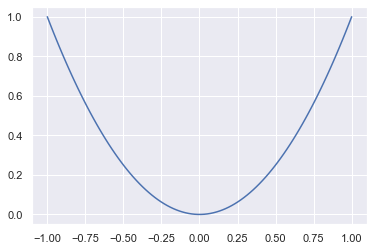

In [17]:
def f(x):
    return x*x

def der_f(x):
    '''derivative of f(x)'''
    return 2*x

def get_tangent_line(x):
    ''' slope of x'''
    return der_f(x)

x = np.linspace(-1,1,100)
plt.plot(x, f(x));

In [18]:
# function to plot the point at various steps

def plot_it(cur_x, title = ''):
     
    plt.plot(x, f(x))
    plt.plot(cur_x, f(cur_x), 'o', color = 'r') # point on curve

#plot_it(2)
#plot_it(.7)
#plot_it(-1)

In [30]:
# Function that takes in various parameters

def find_min(max_iter = 50, 
             cur_x = 0.5,          # inital value of x
             learning_rate = 0.01, # how large the steps are
             epsilon = 0.0025      # check for convergence based on change in the x
            ):
    
    converged = False
    
    plt.figure(figsize = (10,5))
    for i in range(max_iter):

        plot_it(cur_x)
        
        prev_x = cur_x  # previous x
        delta = der_f(cur_x) # derivative
        cur_x = cur_x - learning_rate * delta  # update x

        # check convergence if the difference in udpates of x is less than epsilon
        if (np.abs(cur_x - prev_x) < epsilon):
            converged = True

        if converged == True:
            print('Converged to local minimum in', i, 'steps')
            break

    if not converged:
        print('Did not converge')


Converged to local minimum in 19 steps


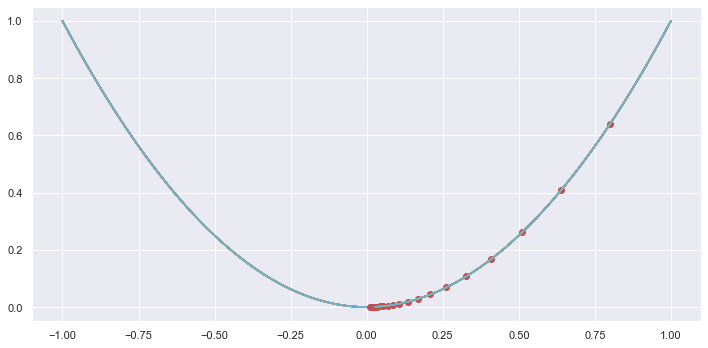

In [31]:
find_min(max_iter = 50, 
             cur_x = .8,          # inital value of x
             learning_rate = 0.1, # how large the steps are
             epsilon = 0.0025      # check for convergence based on change in the x
            )

## Momentum descent
The previous gradients are taken into account when making the update to accelrate the convergence

<img src="./images/SGD_momentum.png" style="width: 600px;" >

In [34]:
# Function that takes in various parameters

def find_min_momentum(max_iter = 50, 
                      cur_x = 0.5,          # inital value of x
                      learning_rate = 0.01, # how large the steps are
                      epsilon = 0.0025,     # check for convergence based on change in the x
                      alpha = 0             # how quickly effect of past gradients decay
                      ):
    
    v = 0
    converged = False
    
    plt.figure(figsize = (10,5))
    for i in range(max_iter):

        plot_it(cur_x)
        
        prev_x = cur_x  # previous x
        delta = der_f(cur_x) # derivative
        
        # define the momentum part of the gradient
        if i == 0:      # for first step, v = gradient itself
            v = delta     
        else:
            v = alpha * v + (1 - alpha)*delta            
        
        cur_x = cur_x - learning_rate * v  # update x

        # check convergence if the difference in udpates of x is less than epsilon
        if (np.abs(cur_x - prev_x) < epsilon):
            converged = True

        if converged == True:
            print('Converged to local minimum in', i, 'steps')
            break

    if not converged:
        print('Did not converge')

Converged to local minimum in 11 steps


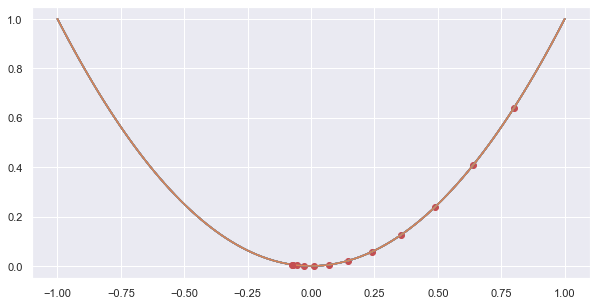

In [50]:
find_min_momentum(max_iter = 50, 
                  cur_x = .8,          
                  learning_rate = 0.1, 
                  epsilon = 0.0025,   
                  alpha = 0.7
            )

Try with $f(x) = x^2 sin(x)$

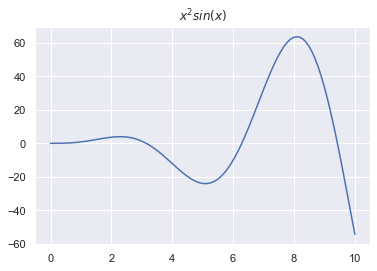

In [17]:
def psin(x):
    return x*x*np.sin(x)

def der_psin(x):
    '''derivative of x*x*sin(x)'''
    return 2*x*sin(x) + x*x*cos(x)

def get_tangent_line_psin(x):
    ''' slope of x'''
    return der_psin(x)

x = np.linspace(0,10,100)
plt.plot(x, psin(x))
plt.title('$x^2 sin(x)$');

***Note how it took only 11 steps with momentum compared to 19 with standard***